In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train = pd.read_csv('https://groups.csail.mit.edu/sls/downloads/movie/engtrain.bio', sep='\t', header=None)
test = pd.read_csv('https://groups.csail.mit.edu/sls/downloads/movie/engtest.bio', sep='\t', header=None)

In [15]:
train.columns = ['tag', 'word']
test.columns =  ['tag', 'word']

In [16]:
train.head(), test.head()

(       tag    word
 0        O    what
 1        O  movies
 2        O    star
 3  B-ACTOR   bruce
 4  I-ACTOR  willis,
        tag      word
 0        O       are
 1        O     there
 2        O       any
 3        O      good
 4  B-GENRE  romantic)

In [17]:
tag_unique = train['tag'].unique()
corpus = train['word'].unique()
tag_unique, len(corpus)

(array(['O', 'B-ACTOR', 'I-ACTOR', 'B-YEAR', 'B-TITLE', 'B-GENRE',
        'I-GENRE', 'B-DIRECTOR', 'I-DIRECTOR', 'B-SONG', 'I-SONG',
        'B-PLOT', 'I-PLOT', 'B-REVIEW', 'B-CHARACTER', 'I-CHARACTER',
        'B-RATING', 'B-RATINGS_AVERAGE', 'I-RATINGS_AVERAGE', 'I-TITLE',
        'I-RATING', 'B-TRAILER', 'I-TRAILER', 'I-REVIEW', 'I-YEAR'],
       dtype=object),
 6710)

In [20]:
import re
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    text = text.lower()
    text = word_tokenize(text)
    text = [word for word in text if word not in stop_words]
    text = [lemmatizer.lemmatize(word) for word in text]
    return text

# train['word']

train['word'] = train['word'].apply(preprocess_text)

train.head()




[nltk_data] Downloading package stopwords to
[nltk_data]     /home/nyanmaruk/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,tag,word
0,O,[]
1,O,[movie]
2,O,[star]
3,B-ACTOR,[bruce]
4,I-ACTOR,[willis]


In [21]:

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(train['word'].apply(lambda x: ' '.join(x)))

X.shape


(99491, 6014)

In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(train['tag'])

y.shape


(99491,)

In [24]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.7336549575355545

              precision    recall  f1-score   support

           0       0.73      0.73      0.73       675
           1       0.63      0.22      0.32        79
           2       0.64      0.53      0.58       335
           3       0.89      0.93      0.91       884
           4       0.62      0.47      0.53       385
           5       0.98      0.53      0.69       469
           6       0.71      0.53      0.61       366
           7       0.00      0.00      0.00        38
           8       0.25      0.02      0.04        47
           9       0.70      0.30      0.42       483
          10       0.80      0.96      0.87        25
          11       0.91      0.31      0.46       536
          12       0.83      0.71      0.77       712
          13       0.62      0.28      0.39        64
          14       0.79      0.49      0.61       370
          15       0.92      0.55      0.69       151
          16       0.48      0.22      0.30       348
          17       0.00    

/home/nyanmaruk/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nyanmaruk/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nyanmaruk/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


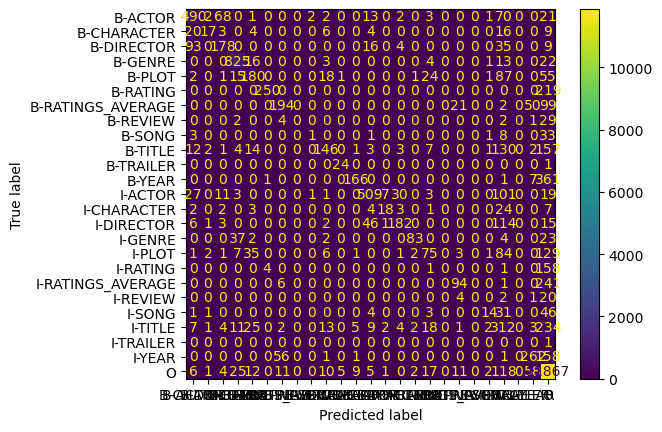

In [26]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay

clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)

disp.plot()


In [3]:
X[0]

array([ 5.05673468e-01,  7.63367815e-03, -1.04398742e-01,  1.70135312e-02,
       -2.46901870e-01, -2.30986908e-01,  2.07226545e-01, -6.85541555e-02,
        9.19617042e-02, -1.20480573e+00, -2.47537449e-01,  2.79073477e-01,
       -2.72488594e-01, -3.39681834e-01, -3.58732730e-01,  1.53132807e-02,
        3.38530689e-01,  2.55053490e-01, -3.08890808e-02, -8.93205628e-02,
        1.47356004e-01, -4.18981820e-01,  5.11656702e-01, -7.26108477e-02,
        4.64691132e-01,  1.32020891e-01,  6.32912576e-01,  2.73891509e-01,
        2.26237476e-02,  4.48610961e-01, -3.33963841e-01,  1.54216781e-01,
       -3.06605518e-01,  1.98837191e-01, -4.78635222e-01,  4.46372449e-01,
       -9.88556305e-04, -7.12239385e-01,  1.99419692e-01,  1.00247122e-01,
       -3.41456711e-01,  6.10519826e-01,  8.25789809e-01,  1.14973320e-03,
       -2.41061762e-01, -4.13446099e-01, -1.57774791e-01,  2.40615234e-01,
        7.70143792e-02,  3.21748465e-01, -3.03006142e-01, -1.45359650e-01,
        4.85412218e-02,  